<a href="https://colab.research.google.com/github/JoDeMiro/TimeSeriesLearn/blob/main/12_TSLearn_Kernel_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Kernel k-means

This example uses Global Alignment kernel (GAK, [1]) at the core of a kernel
$k$-means algorithm [2] to perform time series clustering.

Note that, contrary to $k$-means, a centroid cannot be computed when
using kernel $k$-means. However, one can still report cluster
assignments, which is what is provided here: each subfigure represents the set
of time series from the training set that were assigned to the considered
cluster.

[1] M. Cuturi, "Fast global alignment kernels," ICML 2011.

[2] I. S. Dhillon, Y. Guan, B. Kulis. Kernel k-means, Spectral Clustering and Normalized Cuts. KDD 2004.


In [1]:
!pip install -q tslearn

     |████████████████████████████████| 793 kB 4.9 MB/s 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1275 out of 1275 | elapsed:    8.1s finished


Init 1
80.948 --> 70.106 --> 66.011 --> 63.422 --> 59.720 --> 58.005 --> 57.563 --> 57.563 --> 
Init 2
80.519 --> 70.023 --> 66.522 --> 65.914 --> 65.914 --> 
Init 3
80.374 --> 67.064 --> 62.859 --> 62.220 --> 59.391 --> 59.391 --> 
Init 4
77.700 --> 69.585 --> 67.474 --> 67.022 --> 66.104 --> 65.075 --> 63.516 --> 62.861 --> 62.410 --> 61.166 --> 59.759 --> 59.759 --> 
Init 5
79.246 --> 66.190 --> 63.040 --> 63.040 --> 
Init 6
78.590 --> 68.315 --> 66.321 --> 65.633 --> 63.898 --> 63.898 --> 
Init 7
75.299 --> 63.203 --> 59.963 --> 57.563 --> 57.563 --> 
Init 8
76.876 --> 67.042 --> 66.764 --> 66.764 --> 
Init 9
81.317 --> 69.313 --> 63.927 --> 61.124 --> 59.391 --> 59.391 --> 
Init 10
79.317 --> 72.390 --> 70.197 --> 70.218 --> 70.218 --> 
Init 11
78.202 --> 66.888 --> 60.961 --> 57.946 --> 57.387 --> 57.387 --> 
Init 12
78.194 --> 67.992 --> 65.263 --> 63.436 --> 61.177 --> 57.799 --> 57.387 --> 57.387 --> 
Init 13
77.553 --> 64.028 --> 64.008 --> 64.008 --> 
Init 14
77.853 --> 62.8

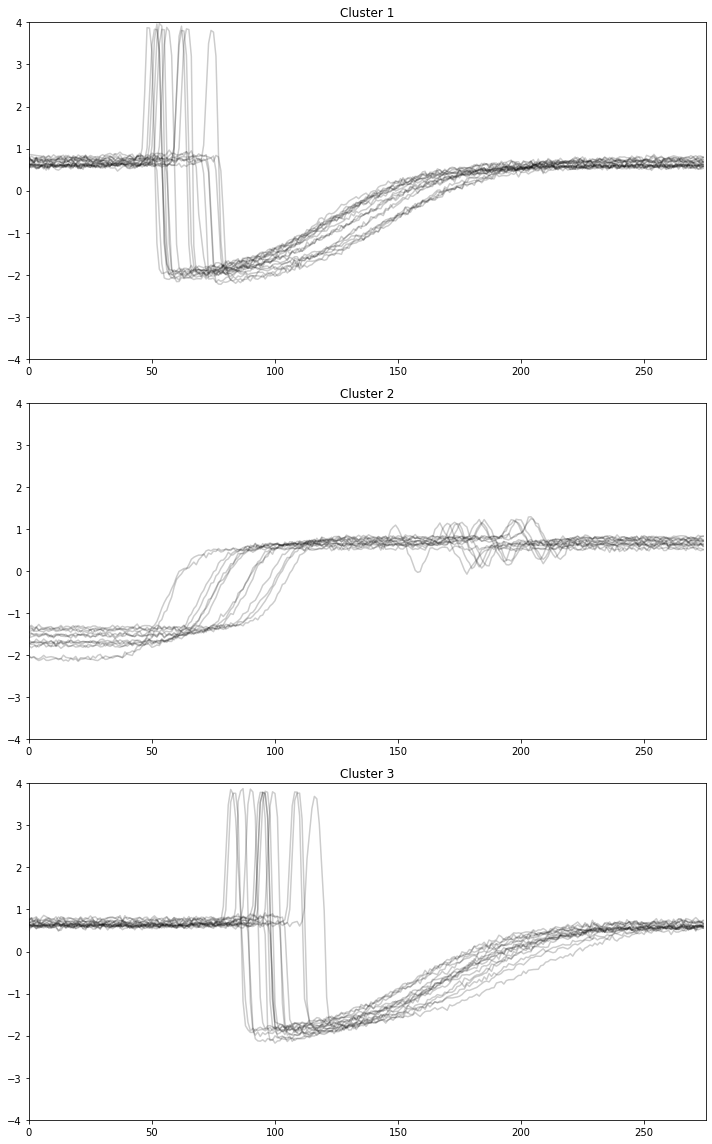

In [3]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KernelKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes
X_train = X_train[y_train < 4]
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
sz = X_train.shape[1]

gak_km = KernelKMeans(n_clusters=3,
                      kernel="gak",
                      kernel_params={"sigma": "auto"},
                      n_init=20,
                      verbose=True,
                      random_state=seed)
y_pred = gak_km.fit_predict(X_train)

plt.figure(figsize=(10, 16))
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()